In [1]:
from main_module import FaceIDModule
from data_module import FaceIDDataset, FaceIDDataModule
from torch.utils.data import DataLoader
from utils.display import display
from argparse import ArgumentParser

In [2]:
parser = ArgumentParser()

# PROGRAM level args
parser.add_argument("--description", type=str, default="FaceID")
parser.add_argument("--data_path", type=str, default="/data/huy/faceid")
parser.add_argument("--preprocess_data", type=int, default=0, choices=[0, 1])

# MODULE specific args
parser = FaceIDModule.add_model_specific_args(parser)

# DATA specific args
parser = FaceIDDataModule.add_data_specific_args(parser)

# TRAINER args
parser.add_argument("--dev", type=int, default=0, choices=[0, 1])
parser.add_argument("--gpu_id", type=str, default="3")
parser.add_argument("--batch_size", type=int, default=128)
parser.add_argument("--no_workers", type=int, default=8)
parser.add_argument("--max_epochs", type=int, default=200)
parser.add_argument("--threshold", type=float, default=0.75)
args = parser.parse_args([])

In [8]:
dataset = FaceIDDataset(args, split="val")
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

In [9]:
faceid_model = FaceIDModule.load_from_checkpoint("checkpoints/best.ckpt")

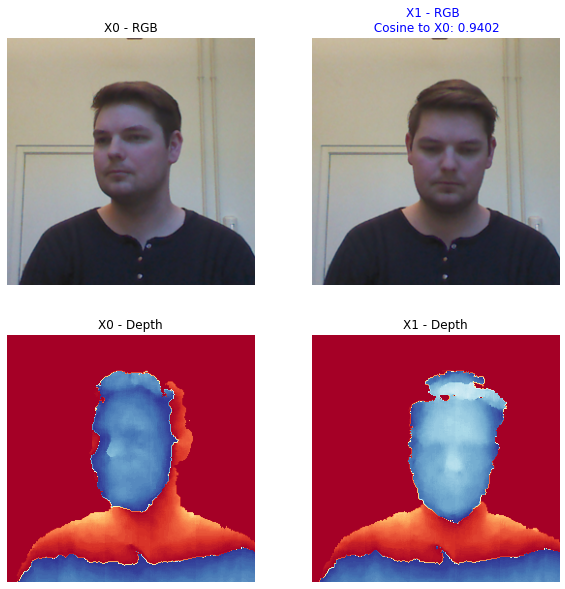

In [12]:
x0, x1, y = next(iter(dataloader))
display(faceid_model, x0, x1)